# Assignment 4B: 2nd Network
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### As we have created our first vanilla network. In this Assignment we are going to make at most 3 changes to achieve two goals.
*  ### 1st to reduce no of parameter
* ### 2nd to increase accuracy 

### So to achieve the goal lets fist install keras library with which we are going to build the model and  import all pakages from keras with which we are going to build the CNN model

In [2]:
# https://keras.io/
!pip install -q keras
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Now we are going to load the pre-shuffled MNIST data. Out of total 70k data we have 60k hand written image as train data and 10k hand written image as test data which is autometically predefined in mnist dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### Let's see how our MNIST data looks like in below. Here we can see the 5th hand written digit in X_train as 2 in the displayed image.

(60000, 28, 28)


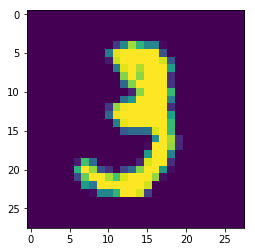

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

### Now we have to shape all the image size in test and train so that we can apply out CNN model based on the input image shape and we will not have any problem while testing with test images with same shape. Let's shape train and test data to (28 , 28 , 1) which is going to be the input dimension of our model.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Here in the below section we are going to scale our pixel values to 0-1 as grey scale pixel lies between 0-255. So to train a robust we must scale the pixcel values.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Let's see how Y looks like as Y values are the actual no corrosponding to an hand written image.

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now we have to convert Y values from 1-dimentional class matrix to 10 dimentional class matrix so that we can predict out of 10 class which class it is predicting.

In [12]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now let's build our CNN model which we are going to apply on our train data for training the model later. Here we are going to use 2-D convolution, maxpooling, dropout and softmax activation function to get output.

In [23]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26

model.add(Convolution2D(20, 3, 3, activation='relu'))#24
model.add(Dropout(0.1))

model.add(Convolution2D(30, 3, 3, activation='relu'))#22
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(10, 3, 3, activation='relu'))#9

model.add(Convolution2D(20, 3, 3, activation='relu'))#7
model.add(Dropout(0.1))

model.add(Convolution2D(30, 3, 3, activation='relu'))#5
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))#5
model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packag

### Here in the model summary we can see that out total no of model parameter is 18.6k which is way less than our 1st vanilla model.

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 20)        1820      
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 30)        5430      
_________________________________________________________________
dropout_14 (Dropout)         (None, 22, 22, 30)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 22, 22, 10)        310       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 10)        0         
__________

### Lets's compile the model with sgd optimizer ,loss as cross entropy and validation matrix as accuracy. After compiling the model we are going to train it with training data and let's see how much training accuracy we get after training completion. Here we have used batch size as 64 and total no of epoch 20 to train the model.

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 1.5293 - acc: 0.4677 - val_loss: 0.4019 - val_acc: 0.8816
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3623 - acc: 0.8882 - val_loss: 0.2003 - val_acc: 0.9392
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2321 - acc: 0.9290 - val_loss: 0.1398 - val_acc: 0.9569
Epoch 4/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1766 - acc: 0.9462 - val_loss: 0.1145 - val_acc: 0.9632
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1505 - acc: 0.9540 - val_loss: 0.0975 - val_acc: 0.9687
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1335 - acc: 0.9592 - val_loss: 0.0899 - val_acc: 0.9723
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1181 - acc: 0.9635 - val_loss: 0.0729 - 

In [26]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.040513473138096744, 0.9869]


#### In this first we can see we have achieved maximum of 98.69% validation accuracy in 20th epoch out of 20. As we can see we have introduced dropout, increased batch size to 64 and changed adam optimizer to sgd. Total global receptive field for this network is 25. Here are few observations:
* #### Here we can see we have reduced no of parameter from 125k to 18.6 k from our previous model with a cost of 0.55% reduction of validation accuracy. Since no filter in each layer is less which is going to capture less texture and gradient information from last model, though computational cost is very less. 
* #### Also, we can see after introducing dropout overfitting reduced between training and validation accuracy at a great extent. 
* #### We have also increased batch size from 32 to 64 which decreased training time from 15s per epoch to 6s per epoch. Also, increasing batch size is going to introduce lot of variation in each batch because of which model is going to perform better.

#### As we have achieved this result in this network, in next few network we will try to reduce parameters and achieve more accuracy by introducing more advance techniques.